In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-define the dataset D_train
D_train = [((8.7, 16.5), 1),
           ((10.8, 14.8), 1),
           ((12, 16.7), 1),
           ((12.2, 12.2), 1),
           ((16.5, 13), -1),
           ((5.8, 23.5), -1)]

# Extracting only the first value of every tuple in X (the x-coordinate)

X = np.array([coord for coord, label in D_train])
y = np.array([label for coord, label in D_train])

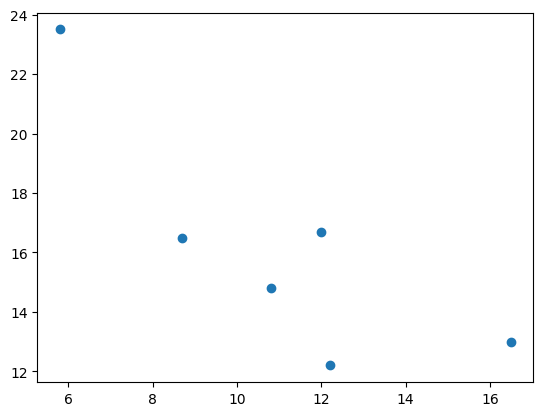

In [6]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

<Figure size 640x480 with 0 Axes>

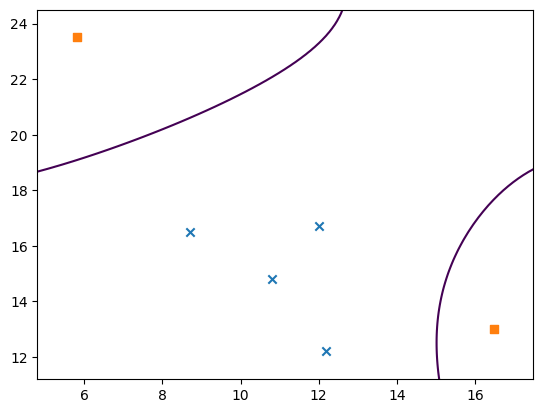

In [58]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

clf = SVC(kernel='rbf',C=1,gamma=0.05).fit(X,y)
plt.figure()
DecisionBoundaryDisplay.from_estimator(clf,X, plot_method="contour",levels=[0])
plt.scatter(X[:,0][y == 1],X[:,1][y == 1], marker='x')
plt.scatter(X[:,0][y == -1],X[:,1][y == -1], marker='s')

plt.show()

In [59]:
w = clf.support_vectors_
w

array([[16.5, 13. ],
       [ 5.8, 23.5],
       [ 8.7, 16.5],
       [12. , 16.7],
       [12.2, 12.2]])

In [32]:
## Testdaten

D_Test = [((13,12.5),1),((6.2,21.3),-1),((6,25.8),1),((8.5,27.7),-1)]

X_Test = np.array([coord for coord, label in D_Test])
y_Test = np.array([label for coord, label in D_Test])

<Figure size 640x480 with 0 Axes>

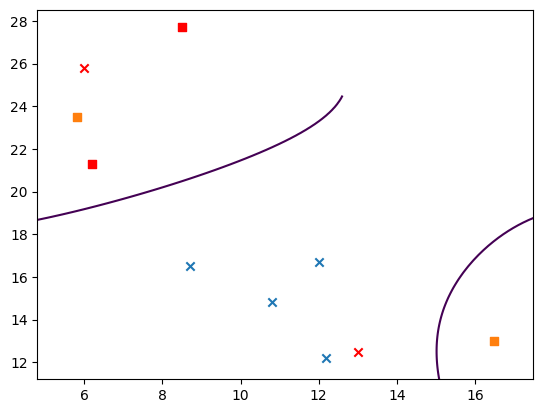

In [60]:
# Plot 

plt.figure()
DecisionBoundaryDisplay.from_estimator(clf,X, plot_method="contour",levels=[0])
plt.scatter(X[:,0][y == 1],X[:,1][y == 1], marker='x')
plt.scatter(X[:,0][y == -1],X[:,1][y == -1], marker='s')

plt.scatter(X_Test[:,0][y_Test == 1],X_Test[:,1][y_Test == 1], marker='x', c = "red")
plt.scatter(X_Test[:,0][y_Test == -1],X_Test[:,1][y_Test == -1], marker='s', c = "red")

plt.show()

In [61]:
## Evaluation


y_pred = clf.predict(X_Test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_Test, y_pred)
accuracy

0.75

In [62]:
from sklearn.metrics import precision_score
precision = precision_score(y_Test, y_pred)
precision

1.0

In [63]:
from sklearn.metrics import recall_score

recall = recall_score(y_Test, y_pred, pos_label=1)
recall

0.5

In [64]:
from sklearn.metrics import f1_score
f1 = f1_score(y_Test, y_pred, pos_label=1)
f1


0.6666666666666666